In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
df = pd.read_csv('model_dataset.csv')

In [4]:
df = df.drop(columns='PTNR_REGIONAL_MASTER_CD')

In [9]:
df.head(10)

,YEARWEEK,TOTAL_SALES
0,2019-12-02,28994.45
1,2019-12-09,127699.87
2,2019-12-16,102609.00
3,2020-06-01,37745.66
4,2020-06-08,72885.09
5,2020-06-15,57311.33
6,2020-06-22,35573.25
7,2020-06-29,20965.50
8,2020-07-06,10669.09
9,2020-07-13,24953.84


In [10]:
sales_by_yearweek = df.groupby('YEARWEEK', as_index=False)['TOTAL_SALES'].sum()

In [11]:
sales_by_yearweek.head(10)


,YEARWEEK,TOTAL_SALES
0,2018-01-01,9365605.46
1,2018-01-08,9176164.13
2,2018-01-15,10573484.69
3,2018-01-22,9145413.08
4,2018-01-29,9229842.10
5,2018-02-05,10087661.51
6,2018-02-12,8972971.81
7,2018-02-19,9274372.48
8,2018-02-26,11873792.12
9,2018-03-05,13721236.15


In [12]:
sales_by_yearweek.to_csv('model_yearweek.csv', index=False)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv('model_yearweek.csv')
df.head(10)

,YEARWEEK,TOTAL_SALES
0,2018-01-01,9365605.46
1,2018-01-08,9176164.13
2,2018-01-15,10573484.69
3,2018-01-22,9145413.08
4,2018-01-29,9229842.10
5,2018-02-05,10087661.51
6,2018-02-12,8972971.81
7,2018-02-19,9274372.48
8,2018-02-26,11873792.12
9,2018-03-05,13721236.15


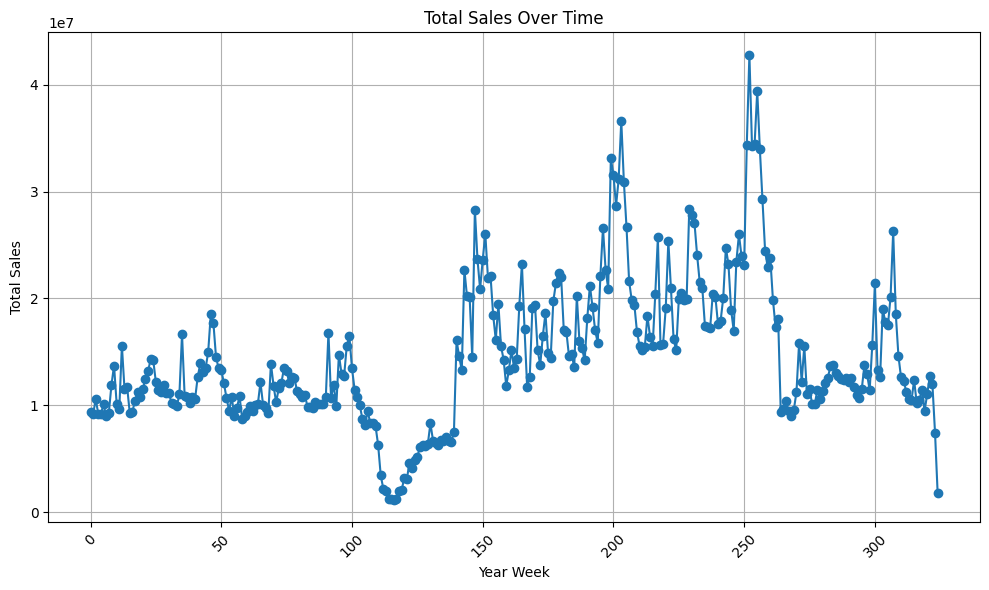

In [3]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['TOTAL_SALES'], marker='o', linestyle='-')

# Add title and labels
plt.title('Total Sales Over Time')
plt.xlabel('Year Week')
plt.ylabel('Total Sales')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add grid for better visualization
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()

In [8]:
df.index = pd.to_datetime(df.index)

# Create a new DataFrame with a complete date range
complete_date_range = pd.date_range(start=df.index.min(), end=df.index.max(), freq='W')
complete_df = pd.DataFrame(index=complete_date_range)

# Merge the original DataFrame with the complete date range DataFrame
merged_df = pd.merge(complete_df, df, how='left', left_index=True, right_index=True)

# Find consecutive missing data
missing_periods = []
current_period = []
for idx, row in merged_df.iterrows():
    if pd.isnull(row['TOTAL_SALES']):
        current_period.append(idx)
    else:
        if current_period:
            missing_periods.append(current_period)
            current_period = []



In [9]:
# Print consecutive missing periods
for period in missing_periods:
    print(f"Missing data from {period[0]} to {period[-1]}")